In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x=np.linspace(-5,5,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [8]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [9]:
x1=np.linspace(-5,5,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

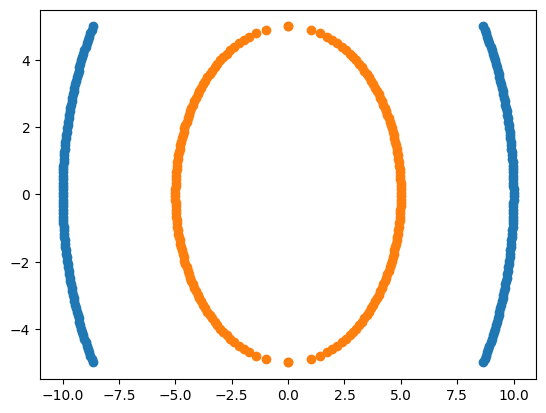

In [10]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [16]:
df1=pd.DataFrame(np.vstack([y,x]).T ,columns=["X1","X2"])
df1["Y"]=0
df2=pd.DataFrame(np.vstack([y1,x1]).T ,columns=["X1","X2"])
df2["Y"]=1
df=pd.concat([df1,df2],ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [18]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [35]:
y_train

250    1
63     0
312    1
159    0
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [36]:
df["X1_sqr"]=df1["X1"]**2
df["X2_sqr"]=df1["X2"]**2
df["X1 * X2"]=df["X1"]*df["X2"]
df.head()

,X1,X2,Y,X1 * X2,X1_sqr,X2_sqr
0,8.660254,-5.00000,0,-43.301270,75.000000,25.000000
1,8.717792,-4.89899,0,-42.708375,75.999898,24.000102
2,8.773790,-4.79798,0,-42.096467,76.979390,23.020610
3,8.828277,-4.69697,0,-41.466150,77.938476,22.061524
4,8.881281,-4.59596,0,-40.818009,78.877155,21.122845


In [37]:
X=df[["X1","X2","X1_sqr","X2_sqr","X1 * X2"]]
y=df["Y"]

In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [40]:
X_train

,X1,X2,X1_sqr,X2_sqr,X1 * X2
250,4.999745,0.050505,NaN,NaN,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,NaN,NaN,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,NaN,NaN,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,NaN,NaN,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [59]:
y_train.shape

(300,)

In [60]:
print(X_train.dtypes)
print(y_train.dtypes)


X1         float64
X2         float64
X1_sqr     float64
X2_sqr     float64
X1 * X2    float64
dtype: object
int64


In [61]:
print(X_train.isnull().sum())


X1           0
X2           0
X1_sqr     155
X2_sqr     155
X1 * X2      0
dtype: int64


In [62]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())  # do same for test set


In [54]:
import plotly.express as px
import plotly.io as pio

# Set default renderer to browser to avoid IPython-related errors
pio.renderers.default = 'browser'

# Make sure z-column is calculated first
df["X1_X2"] = df["X1"] * df["X2"]

# Create 3D scatter plot
fig = px.scatter_3d(df, x="X1", y="X2", z="X1_X2", color="Y")
fig.show()


In [56]:
fig=px.scatter_3d(df,x="X1_sqr",y="X2_sqr",z="X1_X2",color="Y")
fig.show()

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.63

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

1.0

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

1.0